# PartII project - Markdownfile 1
## *Mapping short reads*
### Step 1: The required files

a) Reference genome

*The Hifi genome at path: /home/mb2453/genome/HiFi_Col0/Col-0.ragtag_scaffolds.fa*

b) A list of (long-read) RNAseq run accessions from the desired project

*The list name is the project ID and kept at the path: /home/mb2453/rnaseq/fastq/sample_list/${project}*

*Note: it has to be run accession numebr (not sample or experiment accession numbers)*

c) The raw (long-read) RNAseq fastq files

*The fastq files were obtained using fastq dump using the Run_file.sh script. The fastq files are uploaded into their directory at path: /home/mb2453/rds/hpc-work/fastq/PRJNA605833_fastq*

*In the Run_file.sh script change the project ID. In the file_download.sh script you need to adjust it depending on whether it is single or paired end.*

d) Annotation file (.gtf)

*In directory with path: /home/mb2453/genome/HiFi_Col0/TE_annotations_gffread.gtf, it should look something like this:*

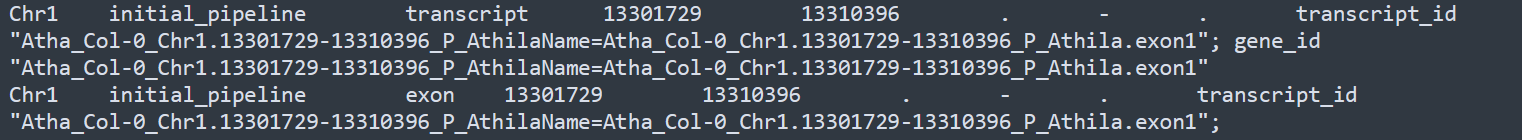

*Make sure it has the right format, you can convert from gff to gtf using:*

In [ ]:
#If the file is in the gff format: 
awk -F'\t' 'BEGIN{OFS="\t"} $1 !~ /^#/ && $3 == "gene" {print $1, $2, "gene", $4, $5, $6, $7, $8, "gene_id \""$9"\";"}' Col-0-Weigel.5_chr.fasta_liftoff.txt > gene_annotation_Weigel.gtf
#If the file is already in the gtf format:
gffread input.gff -T -o output.gtf

### Step 2: Indexing

Run the Run_index.sh script, which will create the necessary indexing files for star in the directory with path: /rds/user/mb2453/hpc-work/mapRNA/mygenome

*If changing the reference genome or annotation gtf file - do so in index_genome.sh*

### Step 3: Mapping

a) Single-mapping 

*In Run_mapRNA.sh change the project to the project ID, and change the SBATCH --array and SBATCH --ntasks to the number of samples in your project.*

In [ ]:
project='Project ID'

*Then run the Run_mapRNA.sh script*

*This will create the STAR alignment files for each sample in the directory: /home/mb2453/rds/hpc-work/mapRNA/${project id}*

b) Multimapping

*Same as for the single mapping, but instead use the Run_mapRNAmm.sh script and change the project to the project ID, the SBATCH --array and SBATCH --ntasks to the number of samples in your project.*

*This will create the STAR alignment files for each sample in the directory: /home/mb2453/rds/hpc-work/mapRNA_mm/${project id}*


### Step 4: Analysing the mapping results

a) Export all the *_STARPaired1hitSortedReadsPerGene.out.tab files from each sample to your local computer

*You can first put all the read files into a new directory to make it quicker to export, using the command:*

In [ ]:
find /home/mb2453/rds/hpc-work/mapRNA/PRJEB9919 -type f -name '*ReadsPerGene.out.tab' -exec mv {} /home/mb2453/rds/hpc-work/mapRNA/PRJEB9919/readspergene \;

*In a new terminal:*

In [ ]:
scp mb2453@login.hpc.cam.ac.uk:/home/mb2453/rds/hpc-work/mapRNA/PRJEB9919/readspergene/* C:\Users\miabe\OneDrive\Desktop\NatSci_PartII\Project\short_read_analysis\PRJEB9919_mm

b) Create heatmaps 

*Use the R script PARTII_short_read_analysis.rmd to create heatmaps and other diagrams*